## Lab 6.1
Remember to commit your notebooks when you are submitting your quiz answer.

### Activity 1 
Name: `2integrals`, `maxgradadd`

Complete  activity 1 before the end of the lab by entering the answer into the CourseSpaces quiz.

Given are the following functions 

$$h(y) = \frac{y^3}{exp(-y)}$$ 

for $y\in[-2.3,0.25]$

$$g(x) = sin(x^2)\frac{x^2}{exp(-\frac{x}{2})}$$ for  $x\in[-2.5,0.25]$ 

1. Make a line plot of both functions in the same diagram, with solid lines of different color.
2. Integrate both function over their respective range using `scipy.integrate.trapz`, using for both x and y arrays with 100 equidistant intervals. Add the numbers and round to two decimals, and enter into quiz `2integrals`.
3. Calculate g and h arrays from x and y input arrays, and use `numpy.gradient` to calculate the derivatives. Add these with dashed lines to the same plot as in 1. Find the max of the gradient of each function within the range. Add the two values, round to two decimals and enter into quiz `maxgradadd`.

**Solution:**

sum of two integral using trapzoid rule: -1.2884319096681716
The sum of two maximum gradient: 5.859960454303806


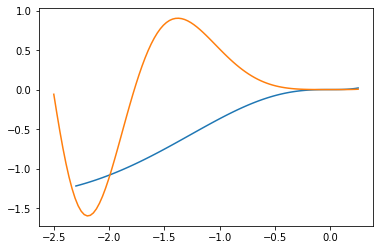

In [21]:
from math import e
import numpy as np
import scipy
x = linspace(-2.5, 0.25, 101)
y = linspace(-2.3, 0.25, 101)
def h(y):
    return (y**3)/(e**(-1*y))
def g(x):
    return (sin(x**2)*(x**2))/(e**((-1*x)/2))
plt.plot(y, h(y))
plt.plot(x, g(x))
tot = scipy.integrate.trapz(h(y), y)+scipy.integrate.trapz(g(x), x)
print("sum of two integral using trapzoid rule: "+str(tot))
#find the gradient
gradient1 = np.gradient(h(y), y)
gradient2 = np.gradient(g(x), x)
maxVal = max(gradient1)+max(gradient2)
print("The sum of two maximum gradient: "+str(maxVal))

### Activity 2
Name: `mcint2d`

Consider 
$$ z(x,y) = h(y) + g(x)$$ for ranges 
```
yrange = (0.3,1.7)
xrange = (-1.5,1)
```

1. Make a `plot_surface` and a `contour` plot of the function.
2. Write a function `mcint2D` that uses the mean-value method to approximate that integral of a 2D function. 
3. Test your function by applying it to a case where you know the answer. 
4. Then, use the function to calculate the integral of $z(x,y)$ over the specified $(x,y)$ range. Make the number of MC random numbers large enough so that the result does not change by more than $1\%$ over 5-10 repeats. Round the result to one decimal and enter into quiz `mcint2d`.

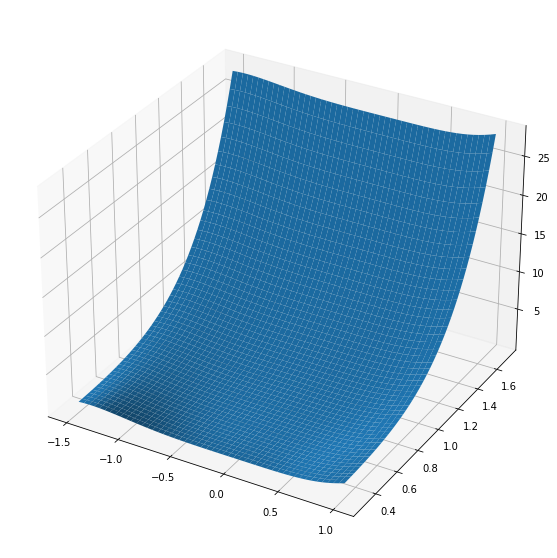

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import random

x = linspace(-1.5, 1)
y = linspace(0.3, 1.7)
def h(y):
    return (y**3)/(e**(-1*y))
def g(x):
    return (sin(x**2)*(x**2))/(e**((-1*x)/2))
def z(h, g, x, y):
    return h(y)+g(x)

X, Y = np.meshgrid(x, y)
ZVal = z(h, g, X, Y)
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, ZVal)# plot the surface
plt.show()

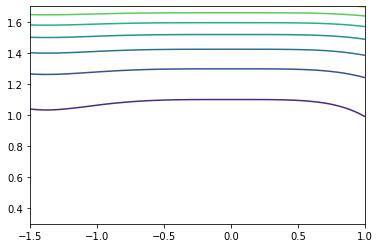

In [48]:
plt.contour(X, Y, ZVal)#plot the contour
plt.show()

In [112]:
def mcint2d(zVal, h, g, z, x, y):
    xlow, xhigh = (-1.5, 1.0)
    ylow, yhigh = (0.3, 1.7)
    integral = 0.0
    N = 100000
    xrand = np.zeros(N)
    yrand = np.zeros(N)
    
    for i in range(N):
        xrand[i] = random.uniform(xlow, xhigh)
        yrand[i] = random.uniform(ylow, yhigh)
    
    for i in range(N):
        integral += z(h, g, xrand[i], yrand[i])
    return ((2.5*1.4)/float(N))*integral
mcint2d(ZVal, h, g, z, X, Y)

22.010580549028052